In [50]:
import random
import time
import enum
import math
from collections import namedtuple
from multiprocessing.pool import Pool
from typing import Tuple, NamedTuple, List

import numpy as np
import pandas as pd
import pylab as plt
import networkx as nx
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from networkgen import Network, NetworkType
from model import OpinionModel, Opinion, OpinionAgent

In [51]:
def create_model(network_type, *params, initial_believers: float, initial_opinion, weight_decay):
    #n = len(Network.generate(network_type, *params).nodes)
    agent_params = OpinionAgent.Params(initial_opinion, weight_decay)
    return OpinionModel(initial_believers, agent_params, network_type, *params)

In [52]:
def sum_agents(model):

    agent_data = model.data_collector.get_agent_vars_dataframe()
    # sum up different opinions each (time) step
    print(agent_data.reset_index())
    agents_summed = pd.pivot_table(agent_data.reset_index(), index = 'Step', columns = 'State', aggfunc = np.size, fill_value = 0)
    # relabel
    labels = ['Disagree','Believer','Unsure']
    agents_summed.columns = labels[:len(agents_summed.columns)]
    return agents_summed

def plot_agent_opinion(model):
    steps = model.schedule.steps
    X = sum_agents(model)
    X.plot(lw = 4, alpha = 0.8)

In [53]:
def plot_network_visualization(model: OpinionModel):
    color_code = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c'])
    states = [int(i.state) for i in model.grid.get_all_cell_contents()]
    colors = [color_code(i) for i in states]
    nx.draw_kamada_kawai(model.network, node_size = 100, edge_color = 'black', node_color = colors)

In [54]:
#pass the model, run it, and plot it
def driver(network_type, *params, initial_believers, initial_opinion, weight_decay):
    model = create_model(network_type, params, initial_believers = initial_believers, initial_opinion = initial_opinion, weight_decay = weight_decay)
    model.run(40)
    plot_agent_opinion(model)
    return model

In [55]:
def plot_network(model):
    plot_network_visualization(model)

In [57]:
"""
outcome_matrix = np.zeros((100,100))

for i in range (100):
    for j in range (100):
        model = driver(NetworkType.CAVEMAN, 5, 10, initial_believers = i / 100, p_opinion_change = j / 100)
        outcome_matrix[i][j] = 0
"""

model = driver(NetworkType.CAVEMAN, 5, 10, initial_believers = 0.3, initial_opinion=0.9, weight_decay=0.1)

ValueError: Length mismatch: Expected axis has 1995 elements, new values have 3 elements

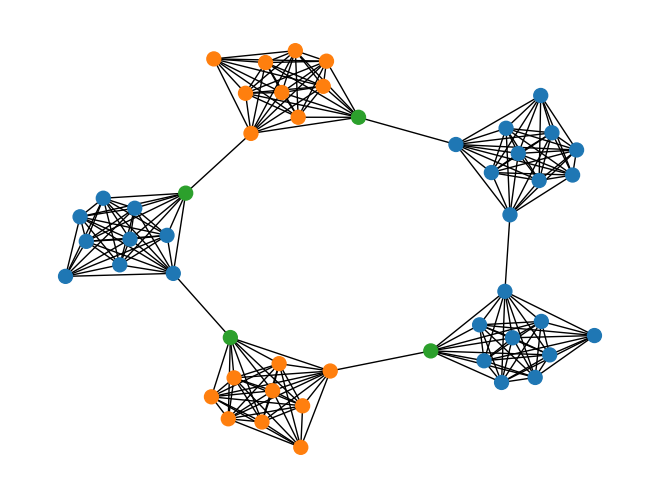

In [ ]:
plot_network(model)